## 0) 라이브러리 임포트

In [24]:
from csv_preprocess import *
from blink import *
from fft import *

## 1) csv파일 전처리

In [25]:
path = './[csvs]2세대 마스크 데이터-수정완료2-new'
save_pre = True

file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

for i, file in enumerate(file_list_csv):
    name = file.split(".")[0]  # 파일명
    csv_dir = os.path.join(path, file)
    csv_file = pd.read_csv(csv_dir)
    pupil_list = csv_file['pupil_size_diameter'].tolist()  # 동공 크기 데이터만 가져오기


    # 0) csv파일 전처리
    interpol_zero = interpolation_zero(pupil_list)
    interpol_nonzero = interpolation_nonzero(interpol_zero)
    thresh_list = thres_zero(interpol_nonzero)

    # 보간 후 csv로 저장
    if save_pre:
        createFolder('./preprocess/')
        with open(f'preprocess/{name}.csv', 'a', encoding='utf-8-sig', newline='') as f:
            print("csv 전처리 완료:", f'preprocess/{name}.csv')
            writer = csv.writer(f)
            writer.writerow(['frame', 'pupil_size_diameter'])
            for i, a in enumerate(thresh_list):
                writer.writerow([i, a])

csv 전처리 완료: preprocess/강동휘가.csv
csv 전처리 완료: preprocess/공경환가.csv


## 2) 눈 감은시간, 눈 깜빡임 횟수 분석

In [26]:
# 그래프 저장 경로
save_img_BD = './img_BD'
save_img_BF = './img_BF'
save_img_fft = './img_fft'  # zero-crossing그래프 저장
save_img_size = './img_size'
createFolder(save_img_BD)
createFolder(save_img_BF)
createFolder(save_img_fft)
createFolder(save_img_size)

In [33]:
def draw_graph2(data, title, y_lim, y_label, savepath, quar=None):
    if quar is None:
        period = ['0~3분', '3~6분', '6~9분', '9~12분', '12~15분', '15~18분', '18~21분', '21~24분', '24~27분', '27~30분', '30~33분']
    else:
        period = [i+1 for i in range(quar)]
    plt.rcParams["font.family"] = 'Malgun Gothic'

    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(1, 1, 1)
    
#     fig, ax = plt.subplots(1,1,figsize=(7,5))

    for i, x in enumerate(data):
        ax.bar(period[i], x, color='b', alpha=0.5)

    plt.xticks(rotation=20)
    plt.title(f'{title}')
    plt.ylim(0, y_lim)
    plt.xlabel('구간')
    plt.ylabel(f'{y_label}')
    plt.tight_layout()
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer._renderer)
    spl = title.split('.')[0]
    plt.savefig(f'{savepath}')
    plt.imshow(img)

count blink done: 강동휘가
경로:  ./img_BF/강동휘가_눈깜.png
count blink done: 공경환가
경로:  ./img_BF/공경환가_눈깜.png


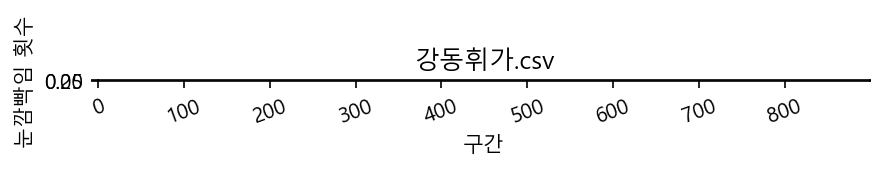

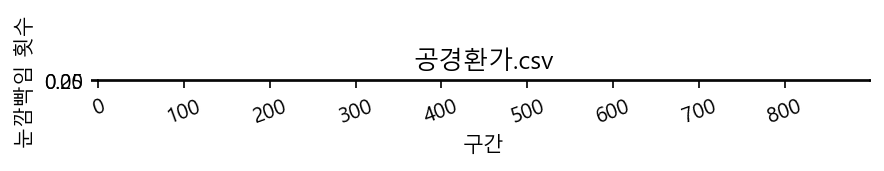

In [37]:
path = './preprocess'
norm = False


minute = None
quarter = 10

if quarter is not None:
    chunk = quarter
else:
    chunk = 30 // minute

    
# 폴더 내 모든 csv파일 읽기    
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

for i, file in enumerate(file_list_csv):
    name = file.split(".")[0]  # 파일명
    csv_dir = os.path.join(path, file)
    csv_file = pd.read_csv(csv_dir)
    pupil_list = csv_file['pupil_size_diameter'].tolist()  # 동공 크기 데이터만 가져오기


    # 눈 감은시간, 눈 깜빡임 횟수 분석
    pupil_frames, pupil_blinks, norm = count_blink(pupil_list, minu=minute, quar=quarter, norm=False)  # 엑셀파일 한사람씩 불러오기

    frame_idx = np.arange(len(pupil_frames))
    blink_idx = np.arange(len(pupil_blinks))
    
    # 엑셀파일로 저장
    BD_df = pd.DataFrame(pupil_frames)
    BF_df = pd.DataFrame(pupil_blinks)

    # 정규화 하는 경우
    if norm:
        createFolder('./norm-BD/')
        createFolder('./norm-BF/')
        BD_df.to_csv('./norm-BD/' + name + '.csv', index=True, encoding='cp949')
        BF_df.to_csv('./norm-BF/' + name + '.csv', index=True, encoding='cp949')

    # 정규화 안하는 경우
    else:
        createFolder('./BD/')
        createFolder('./BF/')
        BD_df.to_csv('./BD/' + name + '.csv', index=True, encoding='cp949')
        BF_df.to_csv('./BF/' + name + '.csv', index=True, encoding='cp949')
    print('count blink done: ' + name)
    
    
    # 그래프로 시각화 및 저장
    # 눈 감은 시간, 눈깜빡임 횟수 막대 그래프 그리기
#     draw_graph(pupil_frames, file, 0.3, '눈감은 시간', f'{save_img_BD}/{name}_눈감.png', quar=quarter)
#     draw_graph(pupil_blinks, file, 0.3, '눈깜빡임 횟수', f"{save_img_BF}/{name}_눈깜.png", quar=quarter)
    print("경로: ", f"{save_img_BF}/{name}_눈깜.png")
    draw_graph(pupil_blinks, file, 0.3, '눈깜빡임 횟수', f"{save_img_BF}/{name}_눈깜.png", quar=quarter)
    
    
    
    
#     # 시각화
#     fig, ax = plt.subplots(1,1,figsize=(7,5))
#     ax.set_xlabel('구간', fontsize=10)
#     ax.set_ylabel('눈 감은 시간', fontsize=10)
    
#     plt.bar(frame_idx, pupil_frames, color = 'gray', linewidth=2.0)
# #     plt.bar(blink_idx, pupil_blinks, color = 'orange', linewidth=2.0)
    
        

## 3) 동공크기 변화율 분석

C:\Users\Dell\Desktop\visual-fatigue-analysis\fft.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_sig = filtered_sig.astype(np.float)


<Figure size 900x600 with 0 Axes>

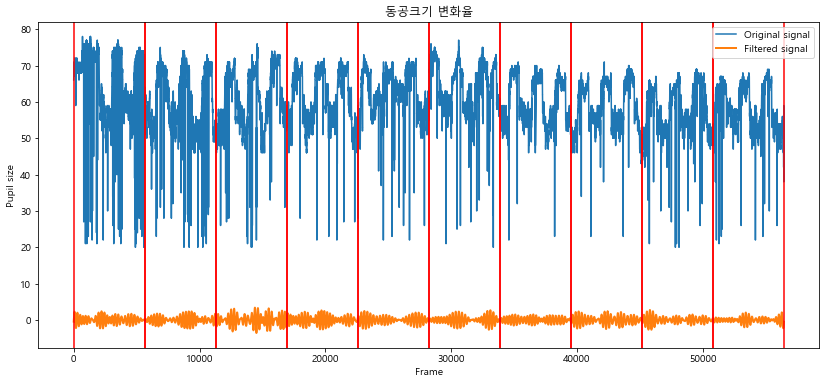

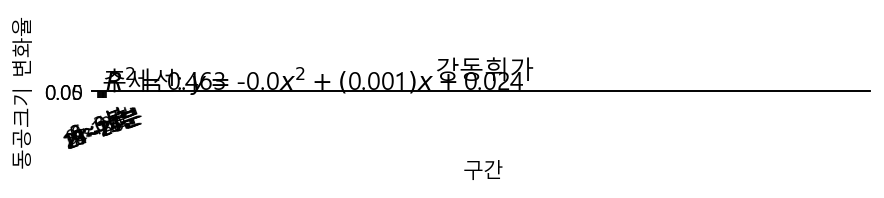

done:  강동휘가


C:\Users\Dell\Desktop\visual-fatigue-analysis\fft.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_sig = filtered_sig.astype(np.float)


<Figure size 900x600 with 0 Axes>

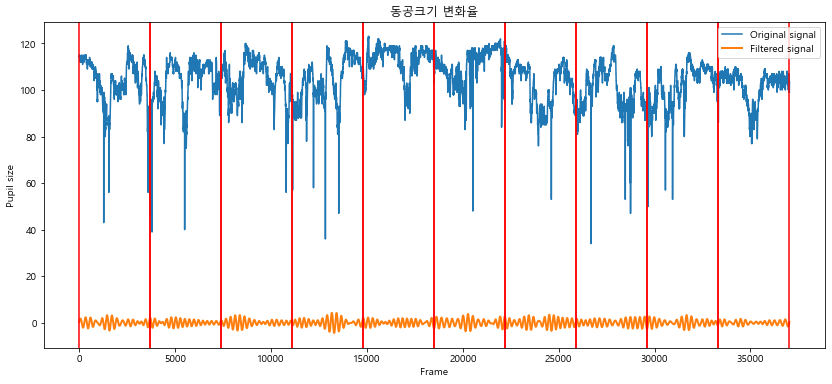

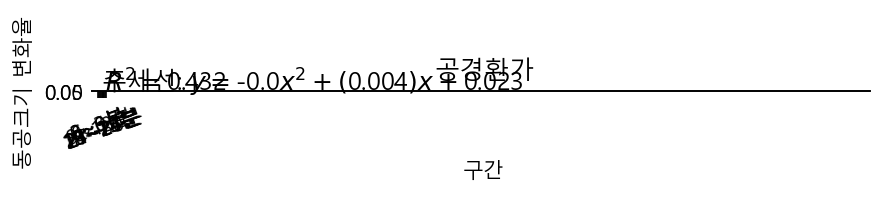

done:  공경환가


In [14]:
path = './preprocess'
norm = False


minute = None
quarter = 10

if quarter is not None:
    chunk = quarter
else:
    chunk = 30 // minute

    
# 폴더 내 모든 csv파일 읽기    
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

for i, file in enumerate(file_list_csv):
    name = file.split(".")[0]  # 파일명
    csv_dir = os.path.join(path, file)
    csv_file = pd.read_csv(csv_dir)
    pupil_list = csv_file['pupil_size_diameter'].tolist()  # 동공 크기 데이터만 가져오기


    # 동공크기 변화율 분석
    filter, zero_cross, section_frames, change_rates_list = fft(pupil_list, minu=minute, quar=quarter)

    # 동공크기 변화율 그래프 그리기
    draw_fft_graph(pupil_list, filter, zero_cross, section_frames, f'{save_img_fft}/{name}.png')

    # 분기 별 변화율 그래프 그리기
    change_rates = []
    for ii, change_rate in enumerate(change_rates_list):
        if change_rate:
            average_change_rate = sum(change_rate) / len(change_rate)
            change_rates.append(average_change_rate)

    draw_trendline_fft(change_rates, name, 0.06, '동공크기 변화율', f'{save_img_size}/{name}_동공변화.png', quar=quarter)
    print("done: ", name)        

## 4) 전체 평균 그래프 그리기(분기수가 같을때만)

In [ ]:
path = './preprocess'

    
# 폴더 내 모든 csv파일 읽기    
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

for i, file in enumerate(file_list_csv):
    name = file.split(".")[0]  # 파일명
    csv_dir = os.path.join(path, file)
    csv_file = pd.read_csv(csv_dir)
    pupil_list = csv_file['pupil_size_diameter'].tolist()  # 동공 크기 데이터만 가져오기


    if len(pupil_frames) == chunk:
        avg_frame.append(pupil_frames)
        avg_blink.append(pupil_blinks)
        avg_size.append(change_rates)

avg_frame = np.array(avg_frame)
avg_blink = np.array(avg_blink)
avg_size = np.array(avg_size)
frame = avg_frame.mean(axis=0)
blink = avg_blink.mean(axis=0)
size = avg_size.mean(axis=0)

# 평균 그래프 시각화
draw_trendline_blink(frame, '눈감은시간 10명 평균', 0.15, '눈감은시간', f'{save_img_BD}/[평균10]_눈감은시간.png', quar=quarter, avg = True)
draw_trendline_blink(blink, '눈깜빡임횟수 10명 평균', 0.15, '눈깜빡임 횟수', f'{save_img_BF}/[평균10]_눈깜빡임횟수.png', quar=quarter, avg = True)
draw_trendline_fft(size, '동공크기 변화율 10명 평균', 0.03, '동공크기 변화율', f'{save_img_size}/[평균]_동공크기 변화율.png', quar=quarter, avg = True)
print("평균 그래프 완료")
